
# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

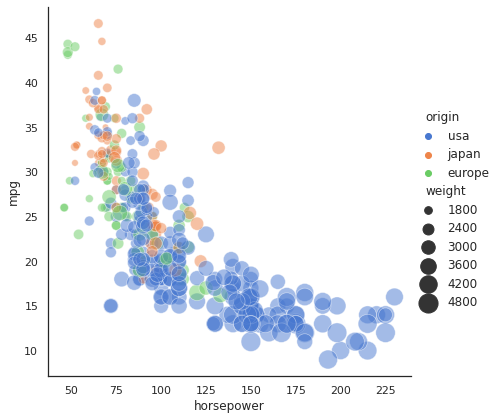

In [1]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

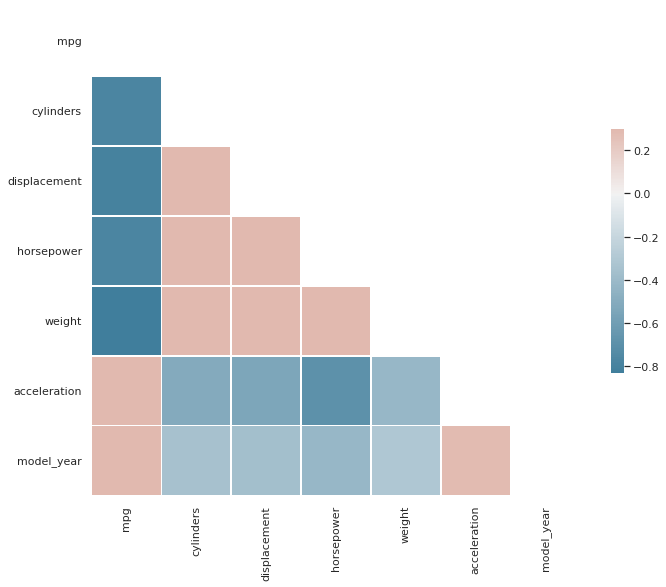

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

# Generate a large random dataset

mpg = sns.load_dataset("mpg")
# Compute the correlation matrix
corr = mpg.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [6]:
mpg.drop(['origin', 'name'], axis=1, inplace=True)
mpg = mpg.dropna()
mpg.sample(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
50,28.0,4,116.0,90.0,2123,14.0,71
321,32.2,4,108.0,75.0,2265,15.2,80
356,32.4,4,108.0,75.0,2350,16.8,81
51,30.0,4,79.0,70.0,2074,19.5,71
299,27.2,4,141.0,71.0,3190,24.8,79


In [8]:
from sklearn.model_selection import train_test_split

X = mpg[['horsepower']]
Y = mpg['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #20%
x_train.sample(5)

,horsepower
342,84.0
132,75.0
241,97.0
60,90.0
217,80.0


In [10]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

y_pred = linear_model.predict(x_test)

Puntaje Entrenamiento:  0.6065250902950887


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Puntaje Testing:  0.5867480363532304


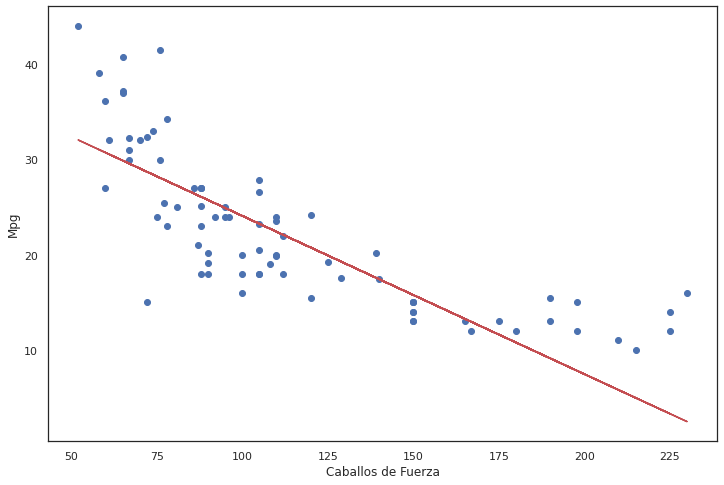

In [12]:
from sklearn.metrics import r2_score



fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Caballos de Fuerza')
plt.ylabel('Mpg')
plt.show()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [15]:
 print('Puntaje Entrenamiento: ', linear_model.score(x_train, y_train))
 print('Puntaje Testing: ', r2_score(y_test, y_pred))


Puntaje Entrenamiento:  0.6065250902950887
Puntaje Testing:  0.5867480363532304


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.